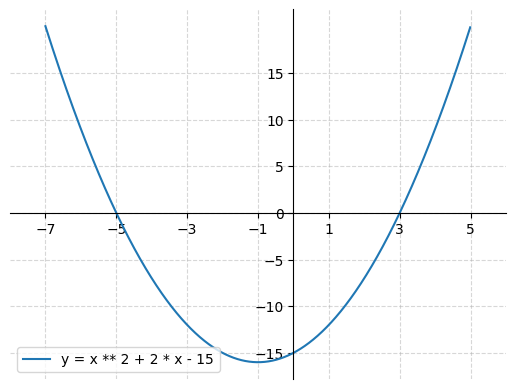

In [1]:
"""
This is a simple 2D plot without interaction for 
a quadratic equation with real solutions.

The quadratic equation:
x ** 2 + 2 * x -15
The quadratic equations has the real solutions:
x1 = 3 and x2 = -5
"""

# Import our modules that we are using
import matplotlib.pyplot as plt
import numpy as np


# Create the range for X and equation for Y
x = np.arange(-7,5,0.01)
y = x ** 2 + 2 * x -15

# Setting the fig and ax variables
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Setting the axes
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(-9, 7, 2.0))
plt.yticks(np.arange(-30, 20, 5.0))
plt.xlim([-8, 6])

# Grids
plt.grid(alpha=.5,linestyle='--')

# Create the plot
plt.plot(x,y,label='y = x ** 2 + 2 * x - 15')

# Add legend
plt.legend(loc='lower left')

# Show the plot
plt.show()

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

def func1(a, b, c):
    x = np.linspace(-10, 10, 1000)
    y = a * x ** 2 + b * x + c
    plt.plot(x, y)
    plt.show()

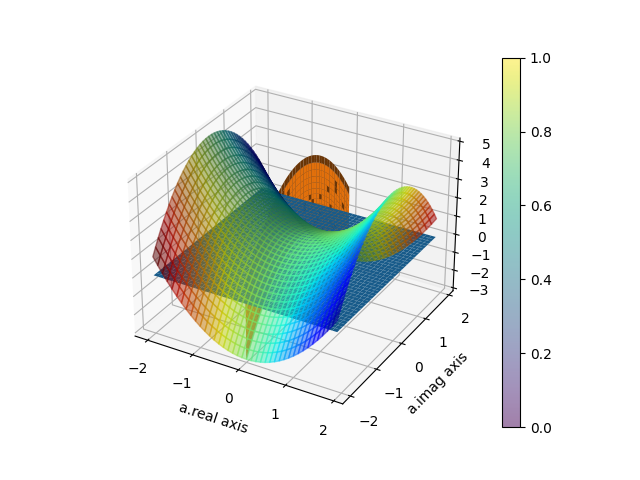

In [5]:
import numpy as np
from matplotlib import cm

def get_coordonates_of_function(f, real_min=-10, real_max=10, img_min=-10, img_max=10):
    range_x = np.arange(real_min, real_max, 0.1)
    range_y = np.arange(img_min, img_max, 0.1)
    Xp, Yp = np.meshgrid(range_x, range_y)
    nr_lin, nr_col = Xp.shape
    result = np.array(
        [[f(x + y * 1j) for x in range_x]for y in range_y]
    )
    Zp = np.real(result)
    Tp = np.imag(result)
    return Xp, Yp, Zp, Tp

def plot_function(f, real_min=-10, real_max=10, img_min=-10, img_max=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot a basic wireframe.
    X, Y, Z, T = get_coordonates_of_function(f, real_min=real_min, real_max=real_max, img_min=img_min, img_max=img_max)
    C = T - np.amin(T)
    C = C / max(0.1, np.amax(C))
    
    # Adding plane Z = 0
    ax.plot_surface(X, Y, 0 * Z, alpha =1)
    
    # Adding plane X = 0
    ax.plot_surface(0 * X, Y, Z, alpha = 1, linewidth=5)
    
    surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet(C), alpha =0.5)

    ax.set_xlabel('a.real axis')
    ax.set_ylabel('a.imag axis')
    ax.set_zlabel('f(a).real axis')
    fig.colorbar(surf)
    
    plt.show()
    
plot_function(lambda a: a**2+1, -2, 2, -2, 2)
    

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib widget

In [16]:
def f(a, b):
    x = a + 1j * b
    # return x ** 2 + 1
    return (x + 4 - 2j)*(x + 4 + 2j)
    # (x + 4-2i)^2
    # 

interactive(children=(IntSlider(value=0, description='real_part', max=10, min=-10), IntSlider(value=0, descrip…

<function __main__.show_plots(real_part, imag_part)>

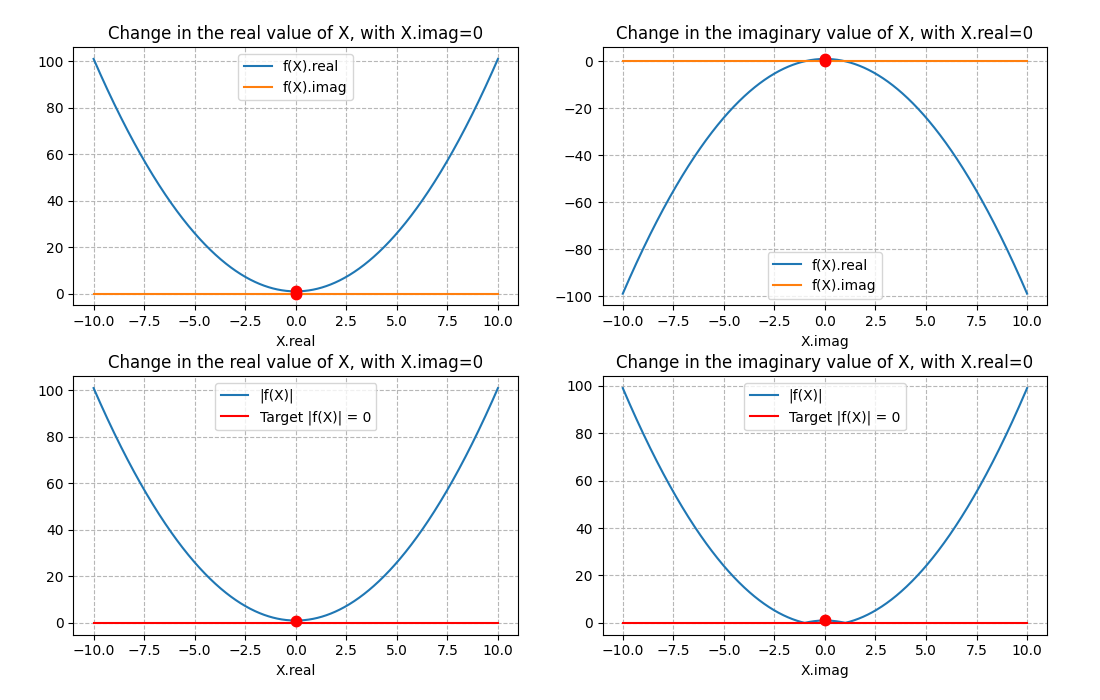

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

def show_plots(real_part, imag_part):
    # delete previous graph
    for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        ax[i][j].cla()

    window_size = 10 # TODO: Change
    fig.tight_layout(pad=3.0)
    
    real_window = np.linspace(real_part - window_size, real_part + window_size, 1000)
    imag_window = np.linspace(imag_part - window_size, imag_part + window_size, 1000)

    real_f_from_real_chaning = np.array([ f(i, imag_part).real for i in real_window])
    imag_f_from_real_chaning = np.array([ f(i, imag_part).imag for i in real_window])
    real_f_from_imag_chaning = np.array([ f(real_part, i).real for i in imag_window])
    imag_f_from_imag_chaning = np.array([ f(real_part, i).imag for i in imag_window])
    
    abs_f_from_real_chaning = np.array([ np.abs(f(i, imag_part)) for i in real_window])
    abs_f_from_imag_chaning = np.array([ np.abs(f(real_part, i)) for i in imag_window])

    ax[0][0].plot(real_window, real_f_from_real_chaning, label='f(X).real')
    ax[0][0].plot([real_part], [f(real_part, imag_part).real], 'r.', markersize=15)
    ax[0][0].plot(real_window, imag_f_from_real_chaning, label='f(X).imag')
    ax[0][0].plot([real_part], [f(real_part, imag_part).imag], 'r.', markersize=15)
    ax[0][0].set_xlabel("X.real")
    ax[0][0].set_title(f"Change in the real value of X, with X.imag={imag_part}")

    ax[0][1].plot(imag_window, real_f_from_imag_chaning, label='f(X).real')
    ax[0][1].plot([imag_part], [f(real_part, imag_part).real], 'r.', markersize=15)
    ax[0][1].plot(imag_window, imag_f_from_imag_chaning, label='f(X).imag')
    ax[0][1].plot([imag_part], [f(real_part, imag_part).imag], 'r.', markersize=15)
    ax[0][1].set_xlabel("X.imag")
    ax[0][1].set_title(f"Change in the imaginary value of X, with X.real={real_part}")

    ax[1][0].plot(real_window, abs_f_from_real_chaning, label='|f(X)|')
    ax[1][0].plot(real_window, 0 * imag_window, 'r', label='Target |f(X)| = 0')
    ax[1][0].plot([real_part], [np.abs(f(real_part, imag_part))], 'r.', markersize=15)
    ax[1][0].set_xlabel("X.real")
    ax[1][0].set_title(f"Change in the real value of X, with X.imag={imag_part}")

    ax[1][1].plot(imag_window, abs_f_from_imag_chaning, label='|f(X)|')
    ax[1][1].plot(imag_window, 0 * imag_window, 'r', label='Target |f(X)| = 0')
    ax[1][1].plot([imag_part], [np.abs(f(real_part, imag_part))], 'r.', markersize=15)    
    ax[1][1].set_xlabel("X.imag")
    ax[1][1].set_title(f"Change in the imaginary value of X, with X.real={real_part}")
    
    for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        ax[i][j].grid(alpha=.9, which='both', linestyle='--')
        ax[i][j].legend()
        #ax[i][j].set_ylim([-5, 5])

    print(f"Plot for the function f(X) = X^2 +8 *X + 12, in the point X = {real_part} + {imag_part} * i:")

    # plt.show()
    return None


real_part = widgets.IntSlider(min=-10, max=10, step=1, value=0)
imag_part = widgets.IntSlider(min=-10, max=10, step=1, value=0)

interact(show_plots, real_part=real_part, imag_part=imag_part)